In [54]:
import numpy as np
import pandas as pd
import category_encoders as ce
import sys, os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [55]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from file_handler import FileHandler
from df_selector import *
from df_cleaner import *
from df_visualizer import *

In [56]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)

# Reading Data

In [93]:
file_handler = FileHandler()

In [94]:
# reading the csv file
df = file_handler.read_csv("../data/BrentOilHistoricalData.csv")
df.head(10)

,Date,Price,Open,High,Low,Vol.,Change %
0,03/19/2008,100.72,104.93,105.10,100.16,144.15K,-4.59%
1,03/18/2008,105.56,102.31,106.18,101.70,132.09K,3.74%
2,03/17/2008,101.75,106.00,107.97,99.50,165.41K,-5.39%
3,03/14/2008,107.55,106.64,108.02,106.24,28.28K,0.01%
4,03/13/2008,107.54,106.31,107.88,105.56,71.56K,1.20%
5,03/12/2008,106.27,105.43,106.45,104.00,80.91K,0.97%
6,03/11/2008,105.25,104.21,105.82,103.30,104.60K,1.05%
7,03/10/2008,104.16,102.30,104.45,101.20,105.13K,1.74%
8,03/07/2008,102.38,102.69,103.98,101.36,117.16K,-0.22%
9,03/06/2008,102.61,101.67,102.95,100.28,120.77K,0.95%


In [95]:
df.tail(10)

,Date,Price,Open,High,Low,Vol.,Change %
4989,07/08/1988,15.05,15.12,15.12,15.00,0.11K,-2.59%
4990,07/07/1988,15.45,14.95,15.45,14.90,0.81K,5.25%
4991,07/06/1988,14.68,14.60,14.68,14.49,0.29K,2.66%
4992,07/05/1988,14.30,14.45,14.58,14.30,0.13K,-0.35%
4993,07/04/1988,14.35,14.50,14.50,14.30,0.17K,-1.71%
4994,07/01/1988,14.60,14.60,14.60,14.60,0.05K,-1.68%
4995,06/30/1988,14.85,14.80,14.90,14.80,0.42K,-4.01%
4996,06/29/1988,15.47,15.47,15.47,15.47,NaN,1.31%
4997,06/28/1988,15.27,15.34,15.36,15.27,0.16K,1.13%
4998,06/27/1988,15.10,15.10,15.10,15.10,0.05K,-3.51%


In [96]:
df.count()

Date        4999
Price       4999
Open        4999
High        4999
Low         4999
Vol.        4996
Change %    4999
dtype: int64

In [97]:
# reading the csv file
brent_df = file_handler.read_csv("../data/BrentOilPrices.csv")
brent_df.head(10)

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
5,27-May-87,18.60
6,28-May-87,18.60
7,29-May-87,18.58
8,01-Jun-87,18.65
9,02-Jun-87,18.68


# General statistics

In [98]:
# number of elements in the df
df.size

34993

In [99]:
df.shape

(4999, 7)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4999 non-null   object 
 1   Price     4999 non-null   float64
 2   Open      4999 non-null   float64
 3   High      4999 non-null   float64
 4   Low       4999 non-null   float64
 5   Vol.      4996 non-null   object 
 6   Change %  4999 non-null   object 
dtypes: float64(4), object(3)
memory usage: 273.5+ KB


# Missing Values

In [101]:
percent_missing_values(df)

The dataset contains 0.01 % missing values.


In [102]:
missing_df = missing_values_table(df)

Your selected dataframe has 7 columns.
There are 1 columns that have missing values.


In [103]:
missing_df

,Missing Values,% of Total Values,Dtype
Vol.,3,0.06,object


In [104]:
# number of rows with missing values for the whole dataset
count_missing_rows(df)

3 rows(0.06%) contain atleast one missing value.


In [105]:
# dataframe containing the missing rows for columns in group 1
miss_df = df[df['Vol.'].isna()]
miss_df.head(10)

,Date,Price,Open,High,Low,Vol.,Change %
2939,08/16/1996,20.53,19.98,20.60,19.87,NaN,-0.19%
4527,05/08/1990,16.70,16.70,17.00,16.70,NaN,2.27%
4996,06/29/1988,15.47,15.47,15.47,15.47,NaN,1.31%


In [106]:
fix_missing_bfill(df, ['Vol.'])

3 missing values in the column Vol. have been replaced                 using the backward fill method.


In [107]:
percent_missing_values(df)


The dataset contains 0.0 % missing values.


# Data Types

In [108]:
#check if there are columns with mixed data types.
show_cols_mixed_dtypes(df)

None of the columns contain mixed types.


In [109]:
df.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %     object
dtype: object

In [110]:
# get the columns with object data type
string_columns = df.select_dtypes(include='object').columns.tolist()
string_columns

['Date', 'Vol.', 'Change %']

In [111]:
convert_to_string(df, string_columns)

In [112]:
convert_to_datetime(df, ['Date'])

In [113]:
df.dtypes

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.        string[python]
Change %    string[python]
dtype: object

In [114]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2008-03-19,100.72,104.93,105.10,100.16,144.15K,-4.59%
1,2008-03-18,105.56,102.31,106.18,101.70,132.09K,3.74%
2,2008-03-17,101.75,106.00,107.97,99.50,165.41K,-5.39%
3,2008-03-14,107.55,106.64,108.02,106.24,28.28K,0.01%
4,2008-03-13,107.54,106.31,107.88,105.56,71.56K,1.20%


# Duplicates

In [115]:
# search for duplicate rows and drop them
drop_duplicates(df)

No duplicate rows were found.


In [116]:
df.duplicated(subset=['Date']).all()

False

# Feature Engineering

## Aggregate Features

In [117]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Date,4999,1998-05-14 06:35:30.186037248,1988-06-27 00:00:00,1993-06-07 12:00:00,1998-05-15 00:00:00,2003-04-26 12:00:00,2008-03-19 00:00:00,NaN
Price,4999.0,28.884309,9.64,17.385,20.42,30.295,107.55,18.737388
Open,4999.0,28.876047,9.7,17.38,20.37,30.2,106.64,18.714679
High,4999.0,29.254927,9.95,17.55,20.61,30.775,108.02,18.983906
Low,4999.0,28.5009,9.55,17.215,20.25,29.795,106.24,18.455512


In [118]:
df['year'] = df['Date'].apply(lambda x: x.year)
df['month'] = df['Date'].apply(lambda x: x.month)
df['day'] = df['Date'].apply(lambda x: x.day)


In [119]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,year,month,day
0,2008-03-19,100.72,104.93,105.10,100.16,144.15K,-4.59%,2008,3,19
1,2008-03-18,105.56,102.31,106.18,101.70,132.09K,3.74%,2008,3,18
2,2008-03-17,101.75,106.00,107.97,99.50,165.41K,-5.39%,2008,3,17
3,2008-03-14,107.55,106.64,108.02,106.24,28.28K,0.01%,2008,3,14
4,2008-03-13,107.54,106.31,107.88,105.56,71.56K,1.20%,2008,3,13


# Ubivariate Analysis

In [84]:
plotly_plot_hist(df, 'Price')

In [120]:
plotly_plot_hist(df, 'year')

# Bivariate Analysis

## Price and year

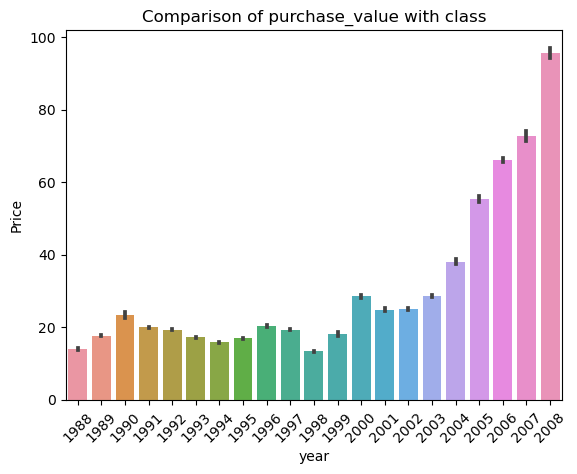

In [125]:

sns.barplot(x='year', y='Price', data=df).set_title('Comparison of purchase_value with class')
plt.xticks(rotation=45)
plt.show()